<a href="https://colab.research.google.com/github/K7S3/GPCR_ML_Residue_Importance/blob/main/V2_Correlation_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Importance/Selection Methods


##Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn import preprocessing
data_in = pd.read_csv("drive/MyDrive/dataset.csv", delimiter=',', encoding="utf-8-sig")



# data.drop(columns=['Rotation'], inplace=True)
# data.drop(columns=['Frame'], inplace=True)
# imputer = KNNImputer(n_neighbors=2, weights="uniform")
# imputer.fit_transform(data)
cols=data_in.columns
cols = cols.astype(str).str.replace(r"[\[\]']", '')
print(cols)
data_in.columns=cols

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(data)
# df_normalized = pd.DataFrame(np_scaled, columns = cols)
# data = df_normalized
# print(data.columns)
# print((data["ALE-435EELEC"]))
data_in.round(2).head().T.head(15).T

Index(['Distance', 'Rotation', 'Delta1', 'Delta2', 'Delta3', 'ALE-230EELEC',
       'ALE-230EVDW', 'ALE-234EELEC', 'ALE-234EVDW', 'ALE-257EELEC',
       ...
       'ALE-430EELEC', 'ALE-430EVDW', 'ALE-431EELEC', 'ALE-431EVDW',
       'ALE-432EELEC', 'ALE-432EVDW', 'ALE-433EELEC', 'ALE-433EVDW',
       'ALE-435EELEC', 'ALE-435EVDW'],
      dtype='object', length=147)


<ipython-input-2-1dc158056790>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = cols.astype(str).str.replace(r"[\[\]']", '')


,Distance,Rotation,Delta1,Delta2,Delta3,ALE-230EELEC,ALE-230EVDW,ALE-234EELEC,ALE-234EVDW,ALE-257EELEC,ALE-257EVDW,ALE-258EELEC,ALE-258EVDW,ALE-259EELEC,ALE-259EVDW
0,12.04,130.83,-65.55,170.94,75.56,0.0,0.0,0.0,0.0,-0.00,-0.0,-0.41,-0.10,-0.54,-0.49
1,11.69,120.81,-61.06,-175.68,70.92,0.0,0.0,0.0,0.0,0.00,0.0,-0.37,-0.16,-0.85,-0.25
2,12.14,120.83,-65.34,172.88,71.19,0.0,0.0,0.0,0.0,-0.00,-0.0,-0.60,-0.18,-1.05,-0.28
3,11.63,115.28,-66.69,165.36,68.38,0.0,0.0,0.0,0.0,0.00,0.0,-0.56,-0.13,-0.63,-0.24
4,11.80,126.82,-60.80,-177.65,89.31,0.0,0.0,0.0,0.0,-0.05,-0.0,-0.57,-0.28,-1.35,-0.35


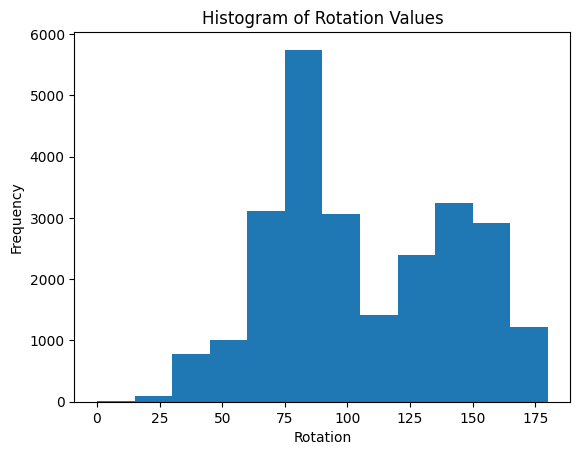

In [ ]:
import matplotlib.pyplot as plt

bin_size = 15

bins = range(0, 181, bin_size)
plt.hist(data_in['Rotation'], bins=bins)
plt.xlabel('Rotation')
plt.ylabel('Frequency')
plt.title('Histogram of Rotation Values')
plt.show()

In [ ]:
# rotation_bins = pd.cut(data_in['Rotation'], bins=bins, include_lowest=True)
# average_distance = data_in.groupby(rotation_bins)['Distance'].mean()
# print(average_distance)

# average_rotation = data_in.groupby(rotation_bins)['Rotation'].mean()
# print(average_rotation)

Rotation
(-0.001, 15.0]     8.618212
(15.0, 30.0]       8.133197
(30.0, 45.0]       7.760132
(45.0, 60.0]       7.421842
(60.0, 75.0]       7.658187
(75.0, 90.0]       8.890224
(90.0, 105.0]      9.384808
(105.0, 120.0]    11.534332
(120.0, 135.0]    11.320537
(135.0, 150.0]    11.384886
(150.0, 165.0]    11.086031
(165.0, 180.0]    10.621315
Name: Distance, dtype: float64
Rotation
(-0.001, 15.0]      9.940157
(15.0, 30.0]       25.638565
(30.0, 45.0]       38.498535
(45.0, 60.0]       53.858028
(60.0, 75.0]       68.426138
(75.0, 90.0]       83.211920
(90.0, 105.0]      95.182801
(105.0, 120.0]    113.554301
(120.0, 135.0]    128.182830
(135.0, 150.0]    142.304373
(150.0, 165.0]    157.405111
(165.0, 180.0]    170.047612
Name: Rotation, dtype: float64


[-2.09959398  2.02160886 -1.72831123  9.48887967]


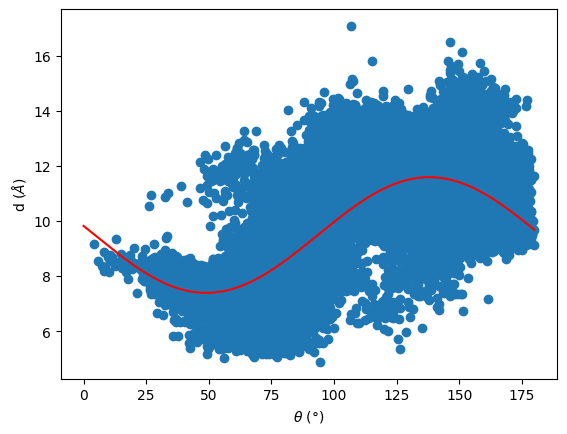

In [ ]:
# from scipy.optimize import curve_fit
# rotation = data_in['Rotation']
# distance = data_in['Distance']

# # Define the sine wave function
# def sine_wave(x, amplitude, frequency, phase, offset):
#     return amplitude * np.cos(frequency * np.pi * (x)/180 + phase) + offset

# # Fit the data with the sine wave function
# p0 = [1, 1, 1, 1]  # Initial guess for the parameters
# popt, pcov = curve_fit(sine_wave, rotation, distance)

# # Extract the optimized parameters
# amplitude, frequency, phase, offset = popt
# print (popt)
# # Generate x-axis values for the sine wave plot
# x = np.linspace(0, 180, 1000)

# # Compute y-axis values using the optimized parameters
# y = sine_wave(x, amplitude, frequency, phase, offset)

# # Plot Distance vs Rotation
# plt.scatter(rotation, distance, label='Data')

# # Plot the best sine wave fit
# plt.plot(x, y, 'r-', label='Sine Wave Fit')

# plt.xlabel(r"$\theta$ $(\degree)$")
# plt.ylabel(r'd $(\AA)$')
# # plt.title('Distance vs Rotation with Sine Wave Fit')
# # plt.legend()
# plt.show()

In [ ]:
# from scipy.optimize import curve_fit

# # Given data points
# rotation = np.array([9.940157, 25.638565, 38.498535, 53.858028, 68.426138, 83.211920, 95.182801, 113.554301, 128.182830, 142.304373, 157.405111, 170.047612])
# distance = np.array([8.618212, 8.133197, 7.760132, 7.421842, 7.658187, 8.890224, 9.384808, 11.534332, 11.320537, 11.384886, 11.086031, 10.621315])

# # Define the sine wave function
# def sine_wave(x, amplitude, frequency, phase, offset):
#     return amplitude * np.sin(frequency * x + phase) + offset

# # Fit the data with the sine wave function
# p0 = [1, 0.1, 0, 10]  # Initial guess for the parameters
# popt, pcov = curve_fit(sine_wave, rotation, distance, p0=p0)

# # Extract the optimized parameters
# amplitude, frequency, phase, offset = popt

# # Sine wave equation
# sine_wave_equation = f"{amplitude:.3f} * sin({frequency:.3f} * x + {phase:.3f}) + {offset:.3f}"
# print(sine_wave_equation)

-0.240 * sin(0.110 * x + -0.974) + 9.487


(160, 180)
(160, 180)
(160, 180)


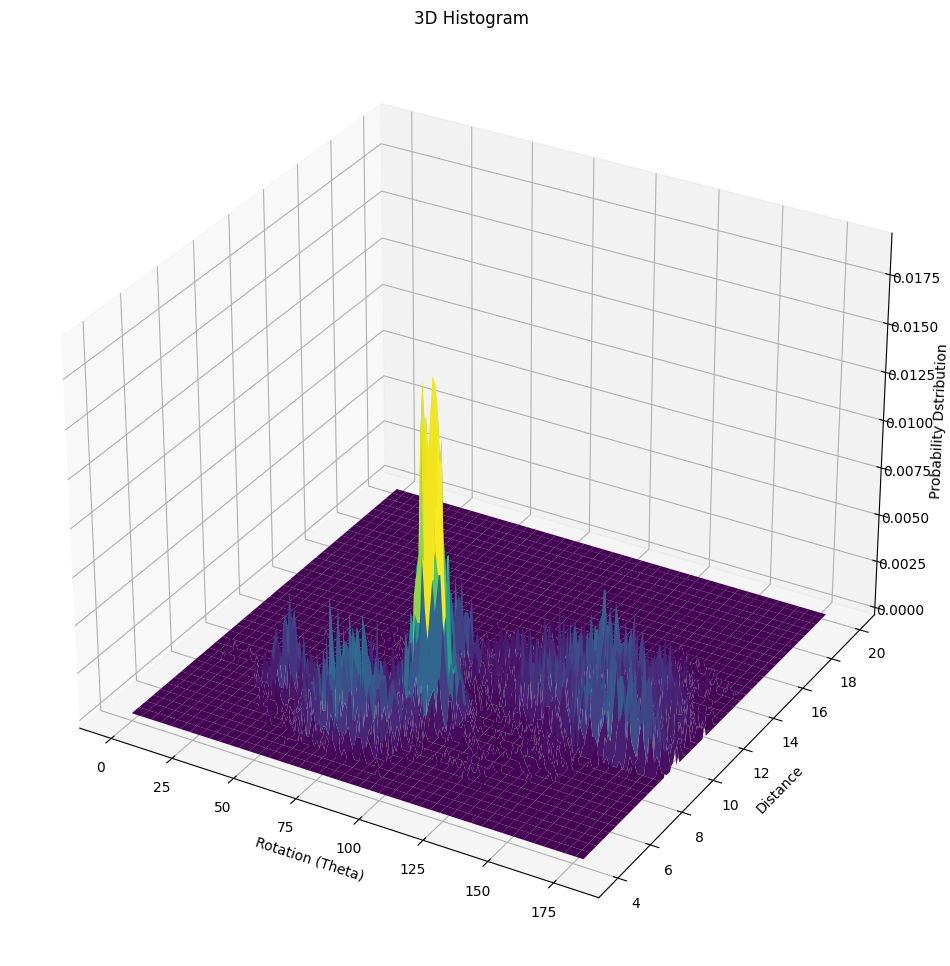

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# # Access the 'Distance' and 'Rotation' columns from the data
# distance = data_in['Distance']
# rotation = data_in['Rotation']

# # Define the bins
# bins_distance = np.linspace(4, 20, 161)
# bins_rotation = np.linspace(0, 180, 181)

# # Compute the 2D histogram
# hist, xedges, yedges = np.histogram2d(rotation, distance, bins=(bins_rotation, bins_distance), density=True)


# # Create meshgrid for 3D plotting
# rotation_mesh, distance_mesh = np.meshgrid(xedges[:-1], yedges[:-1])
# hist=hist.T
# z = -0.6 * np.log(hist + 0.0001)

# # rotation_mesh = rotation_mesh.flatten()
# # distance_mesh = distance_mesh.flatten()

# # hist = hist.flatten()

# print(rotation_mesh.shape)
# print(distance_mesh.shape)
# print(hist.shape)
# # Create the figure and plot the trisurf
# fig = plt.figure(figsize=(15, 12))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(rotation_mesh, distance_mesh, hist, vmin=0, cmap='viridis', edgecolor='none')

# # Set axis labels and title
# ax.set_xlabel('Rotation (Theta)')
# ax.set_ylabel('Distance')
# ax.set_zlabel('Probability Dstribution')
# ax.set_title('3D Histogram')

# # Display the plot
# plt.show()


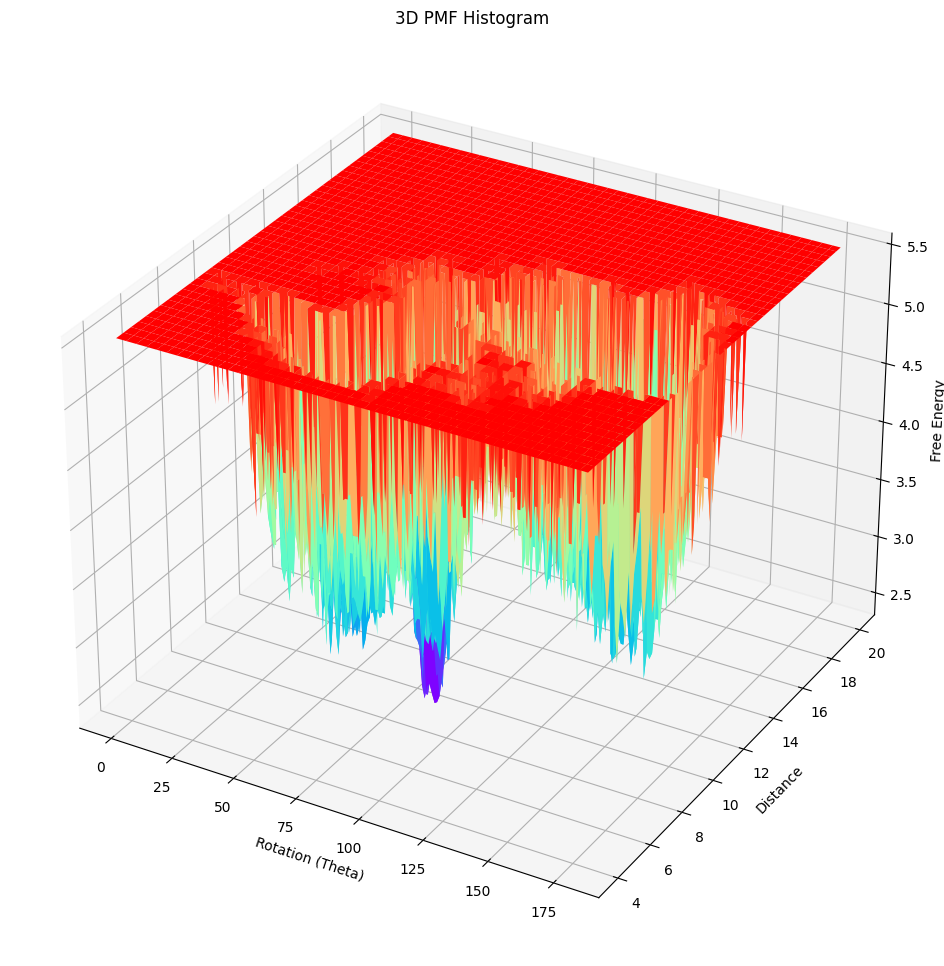

In [ ]:

# fig = plt.figure(figsize=(15, 12))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(rotation_mesh, distance_mesh, z, cmap='rainbow', edgecolor='none')

# # Set axis labels and title
# ax.set_xlabel('Rotation (Theta)')
# ax.set_ylabel('Distance')
# ax.set_zlabel('Free Energy')
# ax.set_title('3D PMF Histogram')

# # Display the plot
# plt.show()


<Figure size 640x480 with 0 Axes>

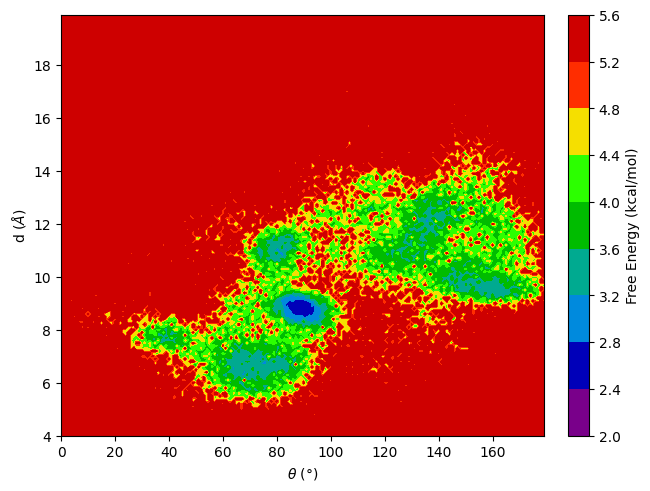

In [ ]:
# plt.figure()

# fig1, ax2 = plt.subplots(layout='constrained')
# CS1 = ax2.contourf(rotation_mesh, distance_mesh, z, levels=7, cmap='nipy_spectral')
# # plt.colorbar(label='z')

# # Set axis labels and title
# ax2.set_xlabel(r"$\theta$ $(\degree)$")
# ax2.set_ylabel(r"d $(\AA)$")
# cbar = fig1.colorbar(CS1)

# cbar.ax.set_ylabel('Free Energy (kcal/mol)')
# # cbar.add_lines(CS1)
# # plt.title('2D PMF Plot')

# # Display the plot
# plt.show()

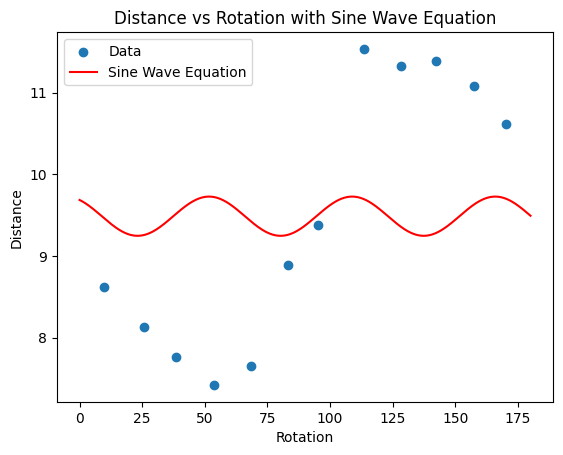

In [ ]:
# rotation = np.array([9.940157, 25.638565, 38.498535, 53.858028, 68.426138, 83.211920, 95.182801, 113.554301, 128.182830, 142.304373, 157.405111, 170.047612])
# distance = np.array([8.618212, 8.133197, 7.760132, 7.421842, 7.658187, 8.890224, 9.384808, 11.534332, 11.320537, 11.384886, 11.086031, 10.621315])

# # Define the sine wave equation
# def sine_wave_equation(x, amplitude, frequency, phase, offset):
#     return amplitude * np.sin(frequency * x + phase) + offset

# # Optimized parameters obtained from curve fitting
# amplitude = -0.240
# frequency = 0.110
# phase = -0.974
# offset = 9.487

# # Generate x-axis values for the plot
# x = np.linspace(0, 180, 1000)

# # Compute y-axis values using the optimized parameters and the sine wave equation
# y = sine_wave_equation(x, amplitude, frequency, phase, offset)

# # Plot the given data points
# plt.scatter(rotation, distance, label='Data')

# # Plot the sine wave equation
# plt.plot(x, y, 'r-', label='Sine Wave Equation')

# plt.xlabel('Rotation')
# plt.ylabel('Distance')
# plt.title('Distance vs Rotation with Sine Wave Equation')
# plt.legend()
# plt.show()

In [ ]:
data_in[data_in.columns[1]]
print(len(cols))
alpha = 1
beta = 1
data2 = pd.DataFrame()

data2["Distance"] = data_in["Distance"]
data2["Rotation"] = data_in["Rotation"]
data2["Delta1"] = data_in["Delta1"]
data2["Delta2"] = data_in["Delta2"]
data2["Delta3"] = data_in["Delta3"]

for i in range(5, 147, 2):
  name =cols[i]+cols[i+1]
  name = name[:7]
  # print(name)
  # print(data['cols[i]'])
  data2[name] =   beta * data_in[cols[i]] + alpha * data_in[cols[i+1]]

# print(data2['ALE-404'])

 
data=data2
data=data.loc[:, abs(data).mean() > 0.5]
print(abs(data).mean().sort_values)
print(len(data.columns))

147
<bound method Series.sort_values of Distance      9.746218
Rotation    106.547687
Delta1       61.786926
Delta2      155.344750
Delta3       75.973065
ALE-258       0.568610
ALE-259       0.904460
ALE-262      11.310768
ALE-263       3.736012
ALE-265       0.571493
ALE-266       0.914868
ALE-267       1.133248
ALE-313       0.565079
ALE-342       2.530826
ALE-344       0.798255
ALE-348       1.280104
ALE-349       0.700656
ALE-352       2.929334
ALE-353       1.335785
ALE-356       1.851292
ALE-404       0.896339
ALE-407       2.150298
ALE-408       2.185787
ALE-411       3.693849
ALE-426       0.891747
ALE-430       3.134140
dtype: float64>
26


In [ ]:
data.round(2).head().T.head(15).T

,Distance,Rotation,Delta1,Delta2,Delta3,ALE-258,ALE-259,ALE-262,ALE-263,ALE-265,ALE-266,ALE-267,ALE-313,ALE-342,ALE-344
0,12.04,130.83,-65.55,170.94,75.56,-0.51,-1.03,-8.83,-3.35,0.17,-0.68,-0.96,-0.33,-3.28,-0.12
1,11.69,120.81,-61.06,-175.68,70.92,-0.54,-1.10,-12.05,-2.89,0.86,0.33,-1.34,-0.02,-3.35,-0.54
2,12.14,120.83,-65.34,172.88,71.19,-0.78,-1.33,-12.95,-3.65,0.28,0.34,-1.62,0.17,-2.28,-0.43
3,11.63,115.28,-66.69,165.36,68.38,-0.68,-0.87,-12.94,-4.87,0.57,-1.20,-1.73,0.08,-3.23,-0.09
4,11.80,126.82,-60.80,-177.65,89.31,-0.85,-1.70,-13.49,-3.64,1.08,-0.55,-0.99,-0.09,-4.27,-0.56


In [ ]:
import collections

mean_values = {}
for i in range(5, len(data.columns), 1):
    mean_values[data.columns[i]] = data.iloc[:, i].mean()

print(mean_values)
sorted_mean_values = dict(sorted(mean_values.items(), key=lambda item: item[1]))
print(sorted_mean_values)
print("Top 10 mean values:")
for key, value in list(sorted_mean_values.items()):
    print(key, value)

{'ALE-258': -0.5168315627374904, 'ALE-259': -0.7182685492580297, 'ALE-262': -7.599482500699971, 'ALE-263': -3.733159729610815, 'ALE-265': 0.48278451261949523, 'ALE-266': -0.6650035678572856, 'ALE-267': -1.110108683652654, 'ALE-313': -0.39846470141194357, 'ALE-342': -2.5220615695372186, 'ALE-344': -0.6957674053037879, 'ALE-348': -1.2137410863565459, 'ALE-349': -0.516079404823807, 'ALE-352': -2.8807804687812486, 'ALE-353': -1.2740642614295428, 'ALE-356': -1.784241966321347, 'ALE-404': -0.8452988160473581, 'ALE-407': -2.051872369105236, 'ALE-408': -2.1665576136954523, 'ALE-411': -3.59208764449422, 'ALE-426': -0.6785336906523738, 'ALE-430': -1.9939605055797769}
{'ALE-262': -7.599482500699971, 'ALE-263': -3.733159729610815, 'ALE-411': -3.59208764449422, 'ALE-352': -2.8807804687812486, 'ALE-342': -2.5220615695372186, 'ALE-408': -2.1665576136954523, 'ALE-407': -2.051872369105236, 'ALE-430': -1.9939605055797769, 'ALE-356': -1.784241966321347, 'ALE-353': -1.2740642614295428, 'ALE-348': -1.21374

##Statistical Coefficient Calculation Based Methods

### Pearson's Correlation Coefficient

In [ ]:
correlations = data.corr()
print(correlations)

          Distance  Rotation    Delta1    Delta2    Delta3   ALE-258  \
Distance  1.000000  0.615829 -0.203723  0.185261 -0.244707 -0.335648   
Rotation  0.615829  1.000000  0.433650  0.086619  0.286823 -0.308737   
Delta1   -0.203723  0.433650  1.000000 -0.010777  0.387158 -0.033697   
Delta2    0.185261  0.086619 -0.010777  1.000000 -0.095626 -0.062677   
Delta3   -0.244707  0.286823  0.387158 -0.095626  1.000000 -0.096421   
ALE-258  -0.335648 -0.308737 -0.033697 -0.062677 -0.096421  1.000000   
ALE-259  -0.242453 -0.408323 -0.275108 -0.128051 -0.214650  0.587706   
ALE-262  -0.034149  0.116472  0.148009 -0.030579  0.052739  0.759910   
ALE-263  -0.122863 -0.119989 -0.025561  0.056626  0.041669  0.277569   
ALE-265  -0.160554 -0.121334 -0.003882 -0.087708  0.170390 -0.592927   
ALE-266  -0.259980 -0.465755 -0.141170 -0.074819  0.056826  0.068672   
ALE-267  -0.105228 -0.021502  0.095552 -0.029430  0.312315 -0.187811   
ALE-313  -0.145023  0.159458  0.247357 -0.124183  0.233044 -0.23

In [ ]:
import matplotlib.pyplot as plt
print(correlations["Distance"].sort_values(ascending=False).head(10))
plt.bar([x for x in range(len(correlations["Distance"]))], correlations["Distance"])
plt.show()

NameError: ignored

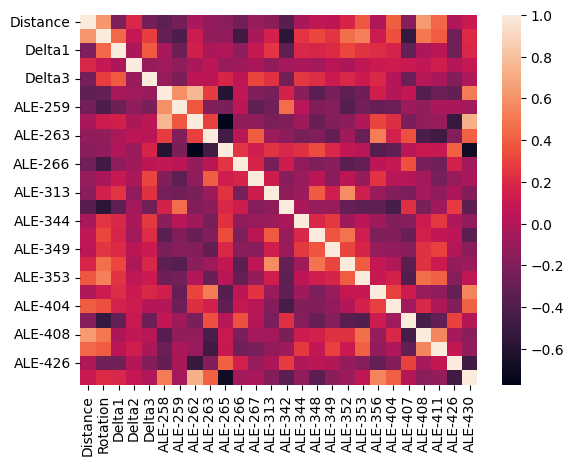

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlations)

plt.show()


###Spearman Correlation Coefficient

In [ ]:
spearman_coeff = data.corr(method="spearman")
print(spearman_coeff)

          Distance  Rotation    Delta1    Delta2    Delta3   ALE-258  \
Distance  1.000000  0.634915 -0.209001  0.128766 -0.191885 -0.271467   
Rotation  0.634915  1.000000  0.395050  0.068677  0.285462 -0.323577   
Delta1   -0.209001  0.395050  1.000000  0.008483  0.376397 -0.040140   
Delta2    0.128766  0.068677  0.008483  1.000000 -0.069934  0.003343   
Delta3   -0.191885  0.285462  0.376397 -0.069934  1.000000 -0.065133   
ALE-258  -0.271467 -0.323577 -0.040140  0.003343 -0.065133  1.000000   
ALE-259  -0.182711 -0.387369 -0.312482 -0.070517 -0.250641  0.496305   
ALE-262   0.031837  0.062320  0.093111  0.054454  0.105765  0.752840   
ALE-263  -0.095369 -0.165893 -0.011014  0.059920  0.137824  0.300303   
ALE-265  -0.213753 -0.095703  0.030001 -0.104570  0.072922 -0.609926   
ALE-266  -0.228558 -0.472966 -0.177709 -0.037748 -0.088146  0.060486   
ALE-267  -0.137378 -0.029661  0.146002 -0.046222  0.429884 -0.164490   
ALE-313  -0.068171  0.091268  0.119400 -0.038449  0.014677 -0.25

Distance    1.000000
Rotation    0.634915
ALE-408     0.564633
ALE-404     0.441187
ALE-411     0.413561
ALE-353     0.370732
ALE-352     0.234096
Delta2      0.128766
ALE-349     0.122380
ALE-430     0.077919
Name: Distance, dtype: float64


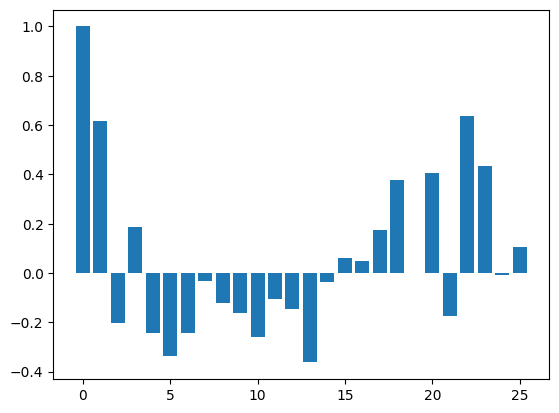

In [ ]:
print(spearman_coeff["Distance"].sort_values(ascending=False).head(10))
plt.bar([x for x in range(len(correlations["Distance"]))], correlations["Distance"])
plt.show()

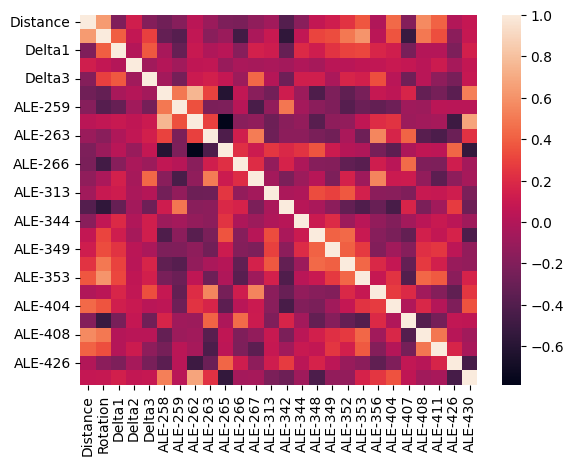

In [ ]:
sns.heatmap(spearman_coeff)

plt.show()

## ML Methods

###Dataset Preparation

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
# test regression dataset
from sklearn.datasets import make_regression
from sklearn import preprocessing
# define dataset
# xa = data.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(xa)
# data = pd.DataFrame(x_scaled, columns=data.columns)
# print(data)
data1=data.drop('Distance', axis=1)
data1=data1.drop('Rotation', axis=1)
data1=data1.drop('Delta1', axis=1)
data1=data1.drop('Delta2', axis=1)
# data1=data1.drop('ALE-398', axis=1)
x=data1.drop('Delta3', axis=1)
y=data['Distance']
# summarize the dataset
print(x)
print(x.shape)
print(y)
print(y.shape)
# print(x['ALE-403']) #trp6.48
# print(x['ALE-356']) #ser5.46
# print(x['ALE-400']) #phe6.44
# print(x['ALE-420']) #leuecl3
# print(x['ALE-259']) #

       ALE-258  ALE-259  ALE-262  ALE-263  ALE-265  ALE-266  ALE-267  ALE-313  \
0      -0.5112  -1.0304  -8.8296  -3.3530   0.1698  -0.6806  -0.9575  -0.3329   
1      -0.5364  -1.0967 -12.0515  -2.8857   0.8556   0.3305  -1.3380  -0.0194   
2      -0.7826  -1.3296 -12.9496  -3.6451   0.2803   0.3368  -1.6178   0.1656   
3      -0.6842  -0.8670 -12.9432  -4.8728   0.5734  -1.1998  -1.7329   0.0784   
4      -0.8496  -1.7037 -13.4942  -3.6394   1.0845  -0.5496  -0.9922  -0.0855   
...        ...      ...      ...      ...      ...      ...      ...      ...   
24996   0.0060   0.2339   0.4957  -2.8920   0.1667  -0.0396  -0.9431  -0.9325   
24997   0.0040   0.3919  -0.5862  -3.6803   0.0623   0.0609  -1.3597  -1.0174   
24998  -0.0706   0.1483  -1.7092  -3.3583   0.5512  -0.0445  -0.3181  -0.5851   
24999   0.0350  -0.4805  -5.2177  -3.1972   0.3027   0.0552  -1.8998  -0.3642   
25000  -0.0096  -0.3196  -3.2692  -2.8480   0.3155   0.4917  -1.0487  -0.1553   

       ALE-342  ALE-344  ..

In [ ]:
print(x['ALE-404']) #trp6.48

0       -0.1173
1        0.1806
2       -0.0532
3       -0.0371
4       -0.2368
          ...  
24996   -2.0507
24997   -1.5844
24998   -1.9608
24999   -1.9439
25000   -1.3082
Name: ALE-404, Length: 25001, dtype: float64


In [ ]:
print(x['ALE-356']) #ser5.46

0       -5.8339
1       -3.9480
2       -5.8192
3       -6.0423
4       -5.3904
          ...  
24996   -1.8507
24997   -2.1789
24998   -1.0300
24999   -1.8101
25000   -3.2582
Name: ALE-356, Length: 25001, dtype: float64


In [ ]:
# print(x['ALE-400']) #phe6.44

In [ ]:
# print(x['ALE-420']) #leuecl3

In [ ]:
# print(x['ALE-359']) #val5.49

In [ ]:
print(x['ALE-430']) #asn7.39

0       -7.1139
1       -2.1024
2       -0.0567
3       -0.7429
4       -2.0934
          ...  
24996   -0.0095
24997    0.0001
24998   -0.0042
24999    0.0731
25000   -1.2366
Name: ALE-430, Length: 25001, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
x[x.isna().any(axis=1)]

,ALE-258,ALE-259,ALE-262,ALE-263,ALE-265,ALE-266,ALE-267,ALE-313,ALE-342,ALE-344,...,ALE-349,ALE-352,ALE-353,ALE-356,ALE-404,ALE-407,ALE-408,ALE-411,ALE-426,ALE-430


###Linear Regression

<ipython-input-22-c8b1b9671641>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-22-c8b1b9671641>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-22-c8b1b9671641>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-22-c8b1b9671641>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-22-c8b1b9671641>:29: FutureWarning: The frame.append method i

    feature  importance
17  ALE-408    0.618602
15  ALE-404    0.448224
10  ALE-348    0.171745
16  ALE-407    0.159649
3   ALE-263    0.102776
20  ALE-430    0.097602
18  ALE-411    0.093766
1   ALE-259    0.088037
19  ALE-426    0.086245
13  ALE-353    0.045262


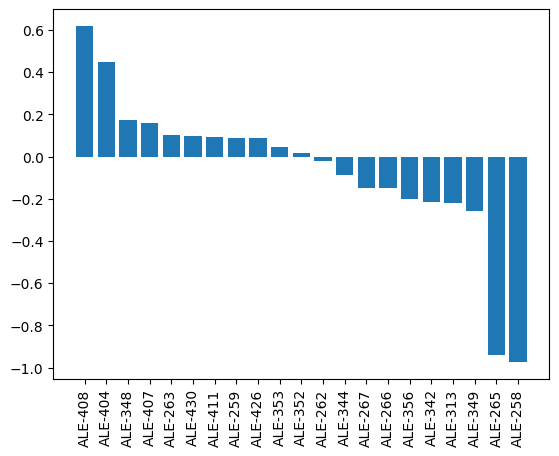

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# define the model
model = LinearRegression()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores
    importance = model.coef_
    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)

lr_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


## Decision Tree Cart

<ipython-input-23-2e5878f7f3a9>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-23-2e5878f7f3a9>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-23-2e5878f7f3a9>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-23-2e5878f7f3a9>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-23-2e5878f7f3a9>:30: FutureWarning: The frame.append method i

    feature  importance
17  ALE-408    0.417709
15  ALE-404    0.143351
1   ALE-259    0.095107
2   ALE-262    0.080936
20  ALE-430    0.039960
14  ALE-356    0.030322
16  ALE-407    0.025297
0   ALE-258    0.025020
12  ALE-352    0.023963
8   ALE-342    0.020873


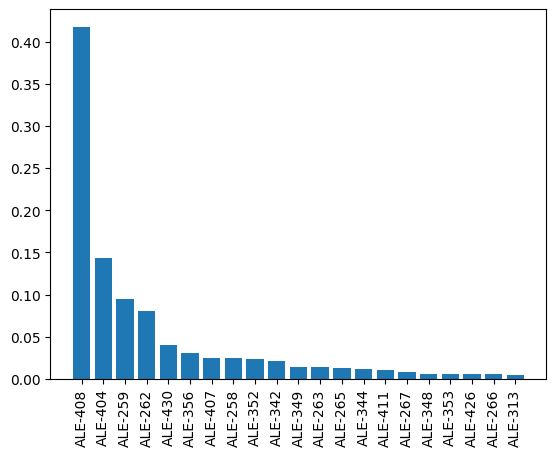

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# define the model
model = DecisionTreeRegressor()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores
    importance = model.feature_importances_

    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)
ds_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


###Random Forest

<ipython-input-24-20e9f7e1b13d>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-24-20e9f7e1b13d>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-24-20e9f7e1b13d>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-24-20e9f7e1b13d>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-24-20e9f7e1b13d>:25: FutureWarning: The frame.append method i

    feature  importance
17  ALE-408    0.418445
15  ALE-404    0.128026
1   ALE-259    0.084683
2   ALE-262    0.069402
20  ALE-430    0.060753
14  ALE-356    0.036630
0   ALE-258    0.031132
16  ALE-407    0.028280
8   ALE-342    0.021884
12  ALE-352    0.020823


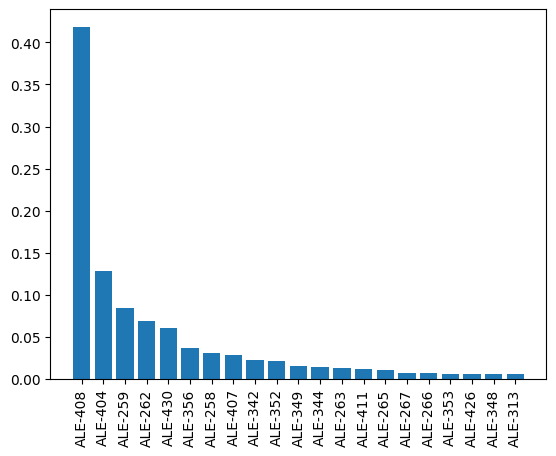

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores
    importance = model.feature_importances_

    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)
rf_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


###XGBOOST

<ipython-input-25-8da1dcab35a5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-25-8da1dcab35a5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-25-8da1dcab35a5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-25-8da1dcab35a5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-25-8da1dcab35a5>:25: FutureWarning: The frame.append method i

    feature  importance
17  ALE-408    0.436924
20  ALE-430    0.094013
15  ALE-404    0.092818
1   ALE-259    0.061573
2   ALE-262    0.056790
14  ALE-356    0.045273
16  ALE-407    0.039770
8   ALE-342    0.026071
11  ALE-349    0.025464
12  ALE-352    0.021301


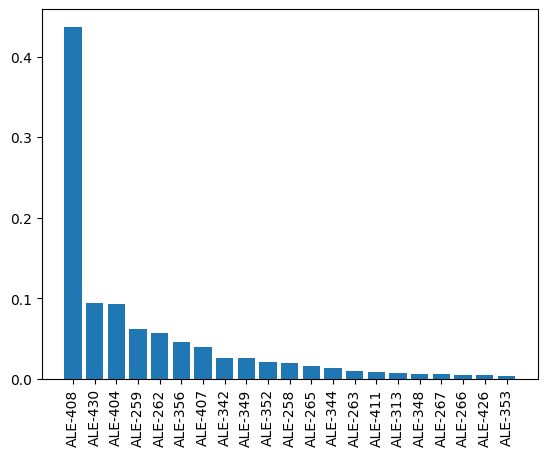

In [ ]:
from xgboost.sklearn import XGBRegressor

# define the model
model = XGBRegressor()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores
    importance = model.feature_importances_

    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)
xgb_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


###KNeighbours

<ipython-input-26-eb8805a13560>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-26-eb8805a13560>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-26-eb8805a13560>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-26-eb8805a13560>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-26-eb8805a13560>:28: FutureWarning: The frame.append method i

    feature  importance
2   ALE-262    0.694203
20  ALE-430    0.182102
18  ALE-411    0.059022
17  ALE-408    0.058872
12  ALE-352    0.052716
14  ALE-356    0.041640
16  ALE-407    0.029422
3   ALE-263    0.025944
8   ALE-342    0.022537
9   ALE-344    0.017537


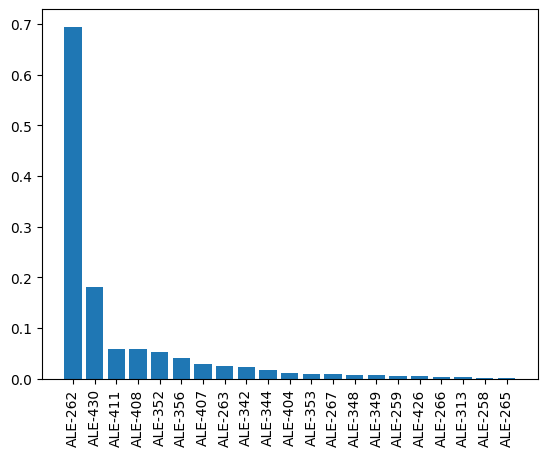

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import numpy as np

# define the model
model = KNeighborsRegressor()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores using permutation importance
    result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=1)
    importance = result.importances_mean

    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)
knn_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
total_avg_score = lr_score + ds_score